In [2]:
import nltk
import torch
from torch.utils.data import DataLoader, Dataset
from collections import Counter
from nltk.tokenize import word_tokenize
from lstm import SimpleLSTM
import torch.optim as optim
import torch.nn as nn

In [3]:
data = '''About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
'''

In [4]:
data = data.lower()

In [5]:
sentences = data.split("\n")
len(sentences)

78

In [6]:
vocab = {'UKN':0}

In [7]:
tokens = word_tokenize(data)

In [8]:
for token in Counter(tokens).keys():
  if token not in vocab:
    vocab[token] = len(vocab)

In [9]:
len(vocab)

289

In [10]:
tokenized_sentences = []
for sentence in sentences:
    tokenized_sentences.append([vocab.get(token,0) for token in sentence.split(" ")])

In [11]:
max_len = max(len(sentence) for sentence in tokenized_sentences)
max_len

57

In [12]:
tokenized_sentences_train = []
for sentence in tokenized_sentences:
    for end in range(1,len(sentence)):
        tokenized_sentences_train.append(sentence[:end+1])

tokenized_sentences_train


[[1, 2],
 [1, 2, 3],
 [4, 5],
 [4, 5, 2],
 [4, 5, 2, 6],
 [4, 5, 2, 6, 7],
 [4, 5, 2, 6, 7, 8],
 [4, 5, 2, 6, 7, 8, 0],
 [4, 5, 2, 6, 7, 8, 0, 9],
 [4, 5, 2, 6, 7, 8, 0, 9, 10],
 [4, 5, 2, 6, 7, 8, 0, 9, 10, 11],
 [4, 5, 2, 6, 7, 8, 0, 9, 10, 11, 3],
 [4, 5, 2, 6, 7, 8, 0, 9, 10, 11, 3, 0],
 [4, 5, 2, 6, 7, 8, 0, 9, 10, 11, 3, 0, 0],
 [2, 6],
 [2, 6, 16],
 [2, 6, 16, 17],
 [2, 6, 16, 17, 18],
 [2, 6, 16, 17, 18, 19],
 [2, 6, 16, 17, 18, 19, 20],
 [2, 6, 16, 17, 18, 19, 20, 21],
 [2, 6, 16, 17, 18, 19, 20, 21, 22],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 18],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 18, 26],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 18, 26, 27],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 18, 26, 27, 28],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 18, 26, 27, 28, 0],
 [4, 5],
 [4, 5, 2],
 [4, 5, 2, 31],
 [4,

In [13]:
from keras.preprocessing.sequence import pad_sequences

padded_sentences = pad_sequences(tokenized_sentences_train, maxlen=max_len, padding='pre', value=vocab['UKN'])
padded_sentences = torch.tensor(padded_sentences)

In [14]:
padded_sentences

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   1,   2,   3],
        [  0,   0,   0,  ...,   0,   4,   5],
        ...,
        [  0,   0,   0,  ..., 285, 176, 286],
        [  0,   0,   0,  ..., 176, 286, 287],
        [  0,   0,   0,  ..., 286, 287, 288]], dtype=torch.int32)

In [15]:
X = padded_sentences[:,:-1]
y = padded_sentences[:,-1]

In [16]:
class LoadDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [17]:
dataset = LoadDataset(X,y)
dataset[3]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 4, 5], dtype=torch.int32),
 tensor(2, dtype=torch.int32))

In [18]:
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [19]:
model = SimpleLSTM(len(vocab))

In [ ]:
epochs = 25
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
device

device(type='cpu')

In [22]:
model.to(device)

SimpleLSTM(
  (embedding): Embedding(289, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=289, bias=True)
)

In [21]:
track_loss = []
for epoch in range(epochs):
    total_loss = 0
    for X,y in dataloader:
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred,y.long())
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
    
    print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")
    track_loss.append(total_loss)

Epoch: 1, Loss: 141.2016
Epoch: 2, Loss: 118.9462
Epoch: 3, Loss: 109.1493
Epoch: 4, Loss: 101.0683
Epoch: 5, Loss: 93.5733
Epoch: 6, Loss: 86.3054
Epoch: 7, Loss: 79.1473
Epoch: 8, Loss: 72.5249
Epoch: 9, Loss: 65.9954
Epoch: 10, Loss: 60.0916
Epoch: 11, Loss: 54.2358
Epoch: 12, Loss: 48.9649
Epoch: 13, Loss: 44.5966
Epoch: 14, Loss: 40.1437
Epoch: 15, Loss: 36.1703
Epoch: 16, Loss: 32.7004
Epoch: 17, Loss: 29.4463
Epoch: 18, Loss: 26.4636
Epoch: 19, Loss: 23.9731
Epoch: 20, Loss: 21.5736
Epoch: 21, Loss: 19.5436
Epoch: 22, Loss: 17.8664
Epoch: 23, Loss: 16.3040
Epoch: 24, Loss: 14.8710
Epoch: 25, Loss: 13.7544
Epoch: 26, Loss: 12.7276
Epoch: 27, Loss: 11.8439
Epoch: 28, Loss: 11.0181
Epoch: 29, Loss: 10.2042
Epoch: 30, Loss: 9.6509
Epoch: 31, Loss: 9.0310
Epoch: 32, Loss: 8.6200
Epoch: 33, Loss: 8.1329
Epoch: 34, Loss: 7.7508
Epoch: 35, Loss: 7.4294
Epoch: 36, Loss: 7.1686
Epoch: 37, Loss: 6.8609
Epoch: 38, Loss: 6.5699
Epoch: 39, Loss: 6.3300
Epoch: 40, Loss: 6.2456
Epoch: 41, Loss:

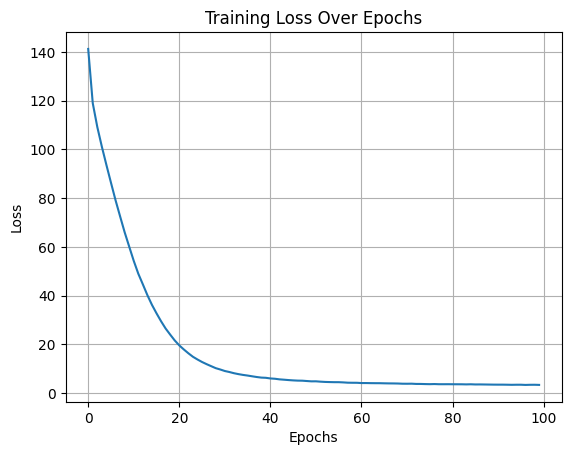

In [22]:
import matplotlib.pyplot as plt

plt.plot(track_loss)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()